In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [5]:
df=pd.read_csv("studentDetail.csv")

In [6]:
df.head()

,Date,name,div,roll no.,father name,mother name,School name,hobby,marks,percentage,average
0,5/2/2021,raj,B,12,raju,rohini,save school,dance,70,70,70
1,9/10/2021,disha,A,13,nilesh,rekha,don bosco,sing,80,60,80
2,7/1/2021,tanu,C,1,naresh,sushma,sd vartak,read,60,90,67
3,16/8/2021,sayli,B,19,rakesh,tani,chinmaya school,write,90,84,78
4,7/9/2021,nita,A,20,amit,radhika,military school,paint,85,67,56


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
Date           5 non-null object
name           5 non-null object
div            5 non-null object
roll no.       5 non-null int64
father name    5 non-null object
mother name    5 non-null object
School name    5 non-null object
hobby          5 non-null object
marks          5 non-null int64
percentage     5 non-null int64
average        5 non-null int64
dtypes: int64(4), object(7)
memory usage: 568.0+ bytes


In [9]:
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df.set_index('Date', inplace= True)

In [10]:
df.head()

,name,div,roll no.,father name,mother name,School name,hobby,marks,percentage,average
Date,,,,,,,,,,
2021-05-02 00:00:00+00:00,raj,B,12,raju,rohini,save school,dance,70,70,70
2021-09-10 00:00:00+00:00,disha,A,13,nilesh,rekha,don bosco,sing,80,60,80
2021-07-01 00:00:00+00:00,tanu,C,1,naresh,sushma,sd vartak,read,60,90,67
2021-08-16 00:00:00+00:00,sayli,B,19,rakesh,tani,chinmaya school,write,90,84,78
2021-07-09 00:00:00+00:00,nita,A,20,amit,radhika,military school,paint,85,67,56


In [14]:
df1 = df[['marks', 'average']] 
df2 = df1.resample('M').mean()

In [15]:
df2.head()

,marks,average
Date,,
2021-05-31 00:00:00+00:00,70.0,70.0
2021-06-30 00:00:00+00:00,NaN,NaN
2021-07-31 00:00:00+00:00,72.5,61.5
2021-08-31 00:00:00+00:00,90.0,78.0
2021-09-30 00:00:00+00:00,80.0,80.0


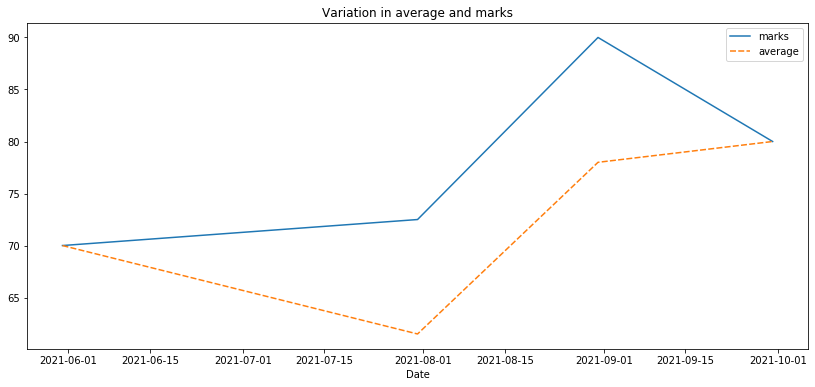

In [16]:
import seaborn as sns

import warnings

warnings.filterwarnings ("ignore") 
plt.figure (figsize=(14,6))

plt.title ("Variation in average and marks")
sns. lineplot (data=df2)

In [17]:
df3 = df2[df2.index.month==4] 
print (df3) 
df3.dtypes

Empty DataFrame
Columns: [marks, average]
Index: []


marks      float64
average    float64
dtype: object

Text(0.5, 0, 'Month of April')

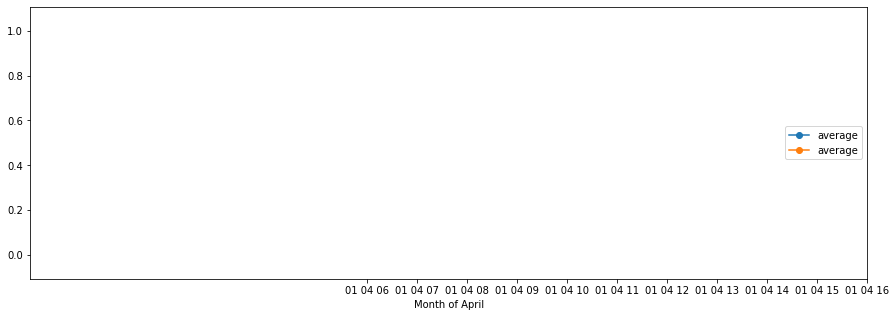

In [20]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(15,5)) 
ax.plot(df3.loc['2006-04-01':'2016-04-01', 'marks'], marker='o', linestyle='-', 
        label='average') 
ax.plot(df3.loc['2006-04-01':'2016-04-01', 'average'], marker='o', linestyle='-', label='average')

ax.set_xticks(['04-01-2006', '04-01-2007', '04-01-2008', '04-01-2009', '04-01-2010','04-01-2011', '04-01-2012',
               '04-01-2013','04-01-2014','04-01-2015','04-01-2016'])
ax.xaxis.set_major_formatter (mdates.DateFormatter('%d %m %y'))                     
ax.legend(loc='center right')
ax.set_xlabel('Month of April')